Mounted at /content/drive
TASK 1: DATA EXPLORATION

COUNTRIES TABLE OVERVIEW

             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
----------------------------------------
Column Descriptions:

name - country name
alpha-2 - two-

/tmp/ipython-input-2722307416.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_events.fillna("Unknown", inplace=True)


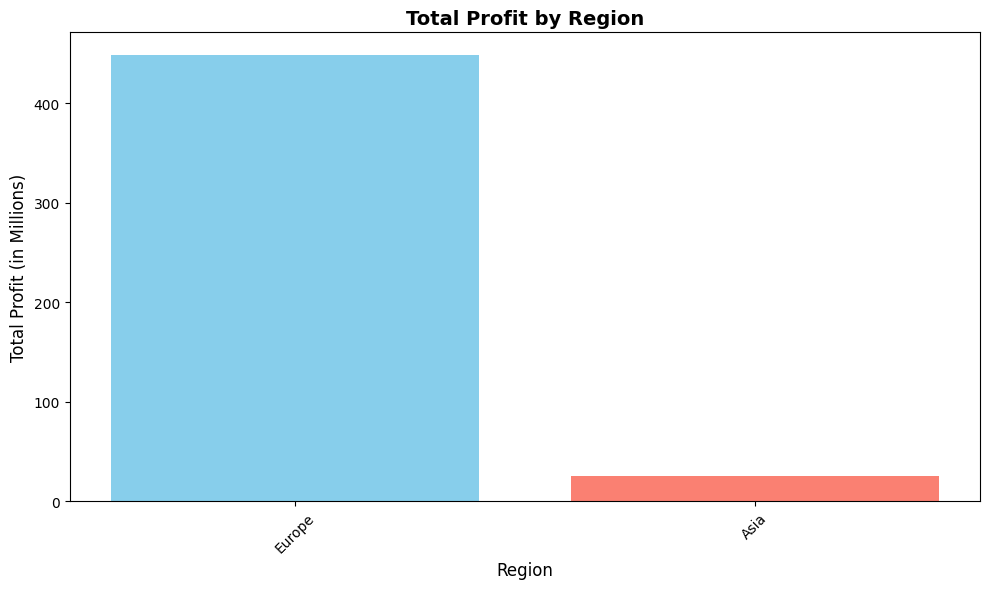

----------------------------------------
FINDINGS: As shown, sales are heavily concentrated in Europe. Asia accounts for only a small fraction of the total volume.
----------------------------------------
GENERATING VISUALIZATION: SALES ANALYSIS BY COUNTRY


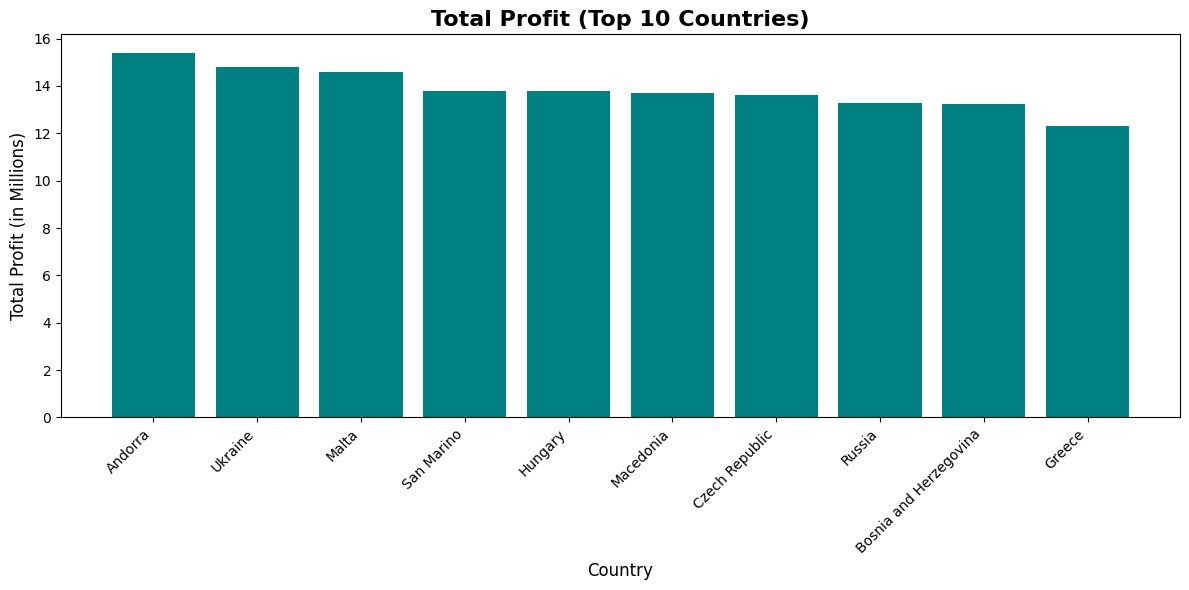

----------------------------------------
FINDINGS: Interestingly, the top 10 countries show very similar total profit levels. 
This uniformity is noteworthy given the significant economic and geographical differences between these nations.
----------------------------------------
GENERATING VISUALIZATION: SALES ANALYSIS BY PRODUCT CATEGORY


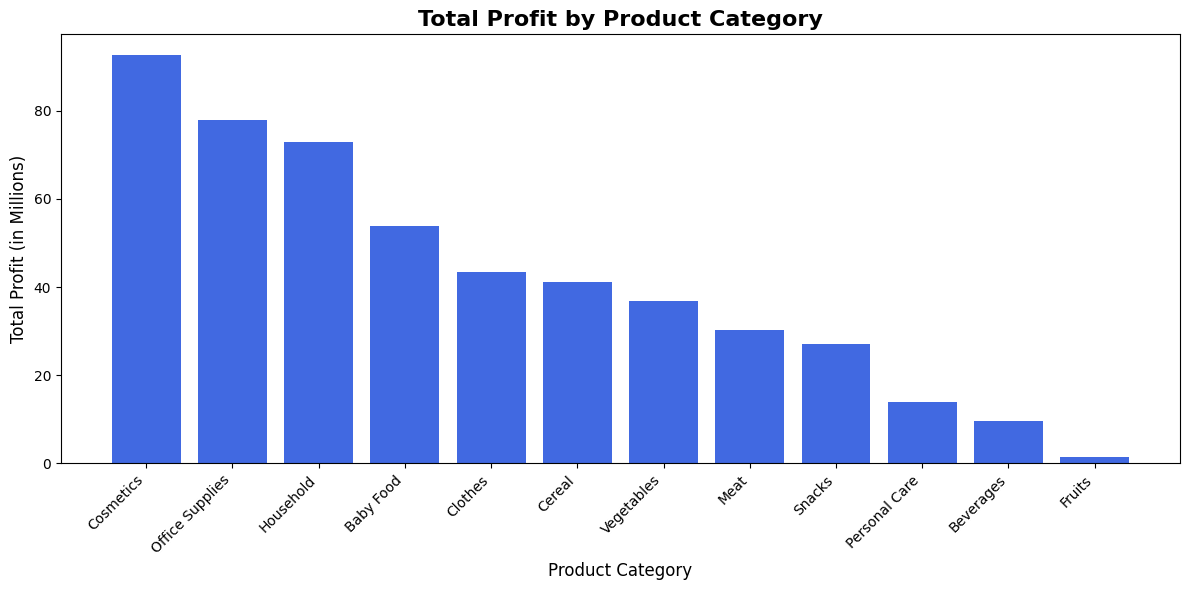

----------------------------------------
FINDINGS: Most categories show distinct sales performance; however, 
no single category significantly outperforms the rest of the portfolio.
----------------------------------------
GENERATING VISUALIZATION: TOTAL PROFIT BY SALES CHANNEL


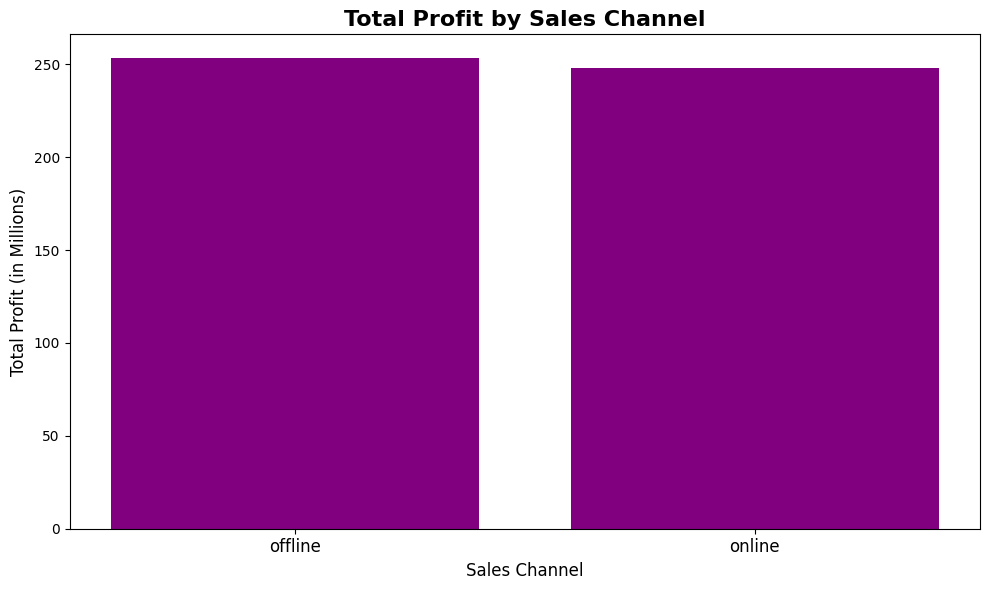

----------------------------------------
FINDINGS: Sales performance is remarkably balanced between Online and Offline channels,
with a marginal lead for the Offline segment.
----------------------------------------
TASK 3.3: LOGISTICS PERFORMANCE (SHIPPING TIME ANALYSIS)

GENERATING VISUALIZATION: AVERAGE SHIPPING DURATION BY CATEGORY


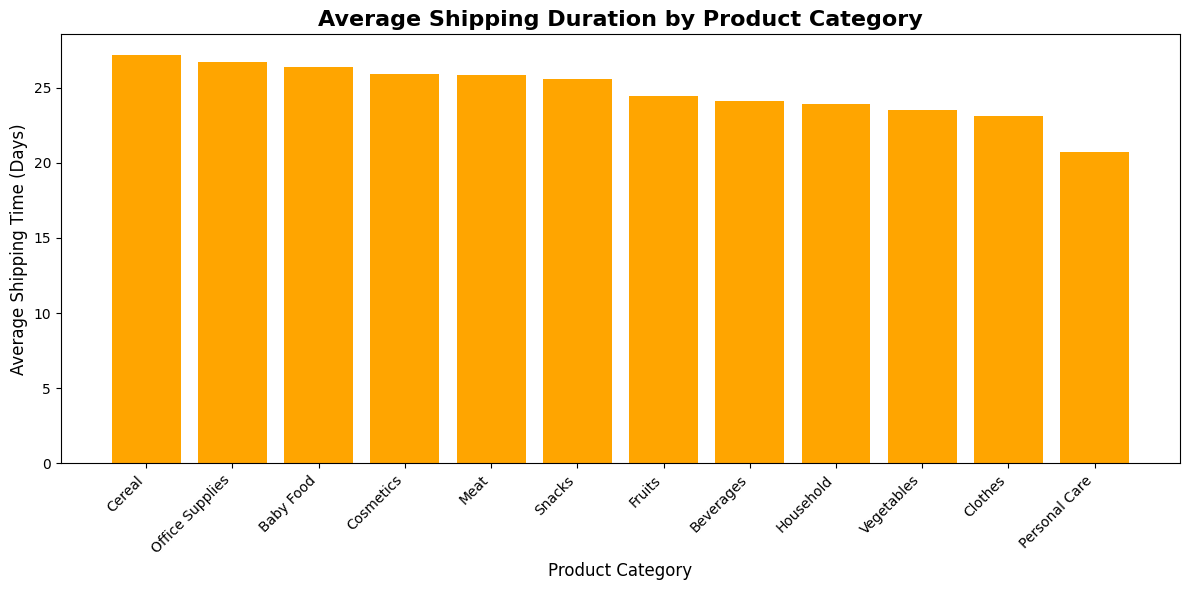

----------------------------------------
FINDINGS: The average shipping duration is consistent across all product categories,
indicating a standardized logistics process with minimal variance between different goods.
----------------------------------------
GENERATING VISUALIZATION: AVERAGE SHIPPING DURATION BY COUNTRY (TOP 10)


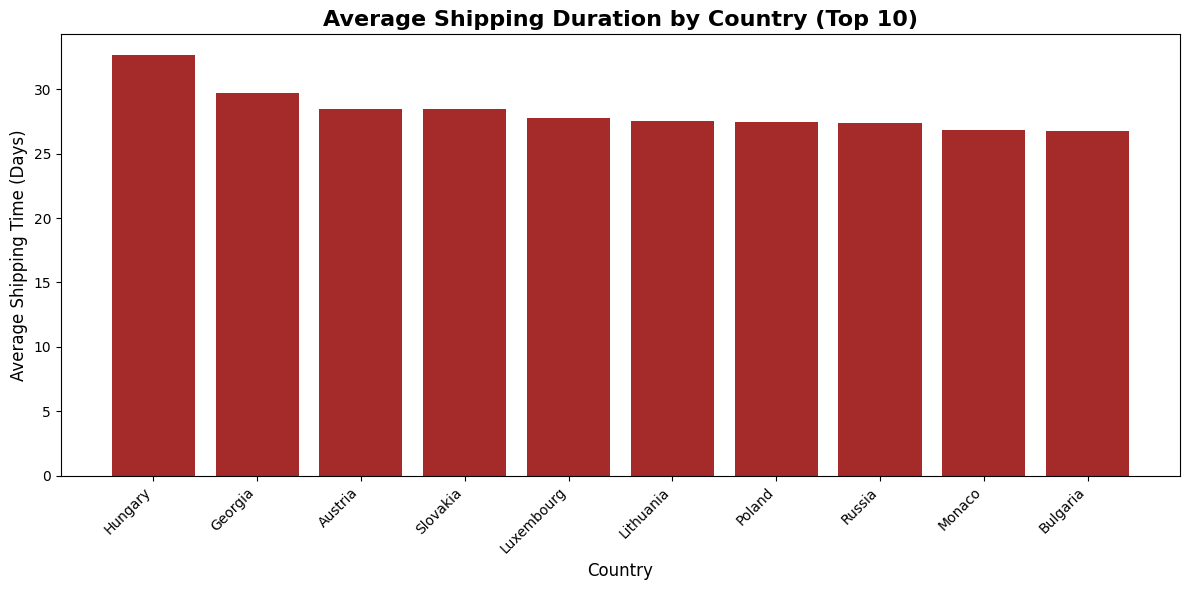

----------------------------------------
FINDINGS: Shipping times are remarkably consistent across countries. 
Only Hungary shows a slight deviation with a marginally longer average duration.
----------------------------------------
GENERATING VISUALIZATION: AVERAGE SHIPPING DURATION BY REGION


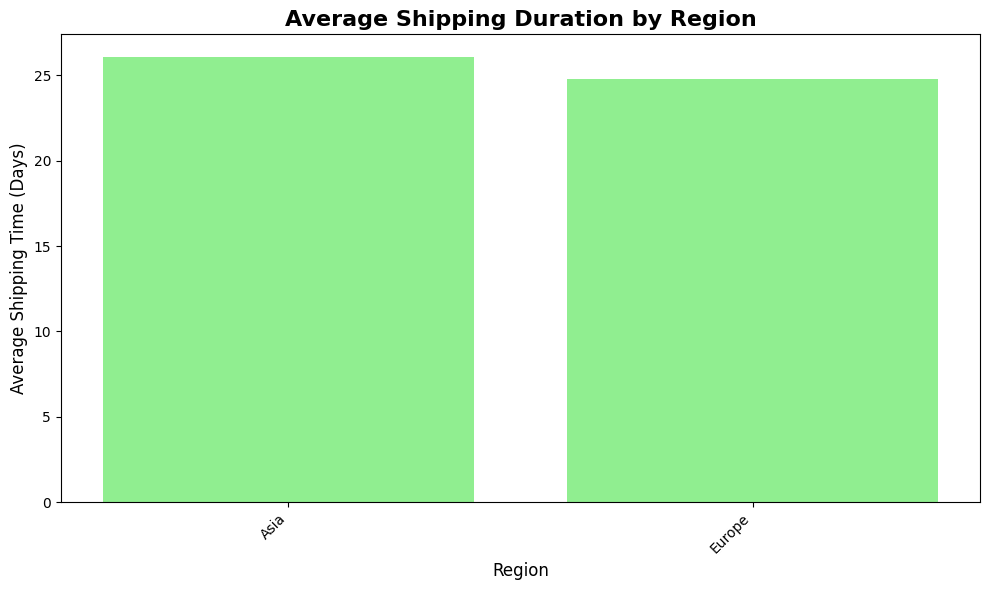

----------------------------------------
FINDINGS: Asia exhibits a slightly longer average shipping duration compared to Europe, 
though the variance remains minimal.
----------------------------------------
TASK 3.4: CORRELATION ANALYSIS (PROFIT VS. SHIPPING TIME)



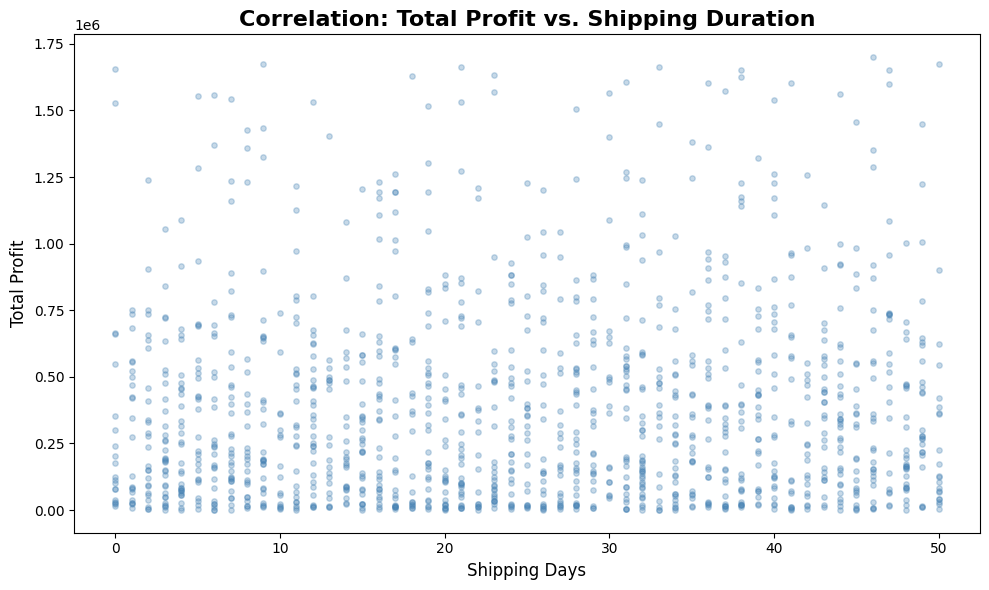

----------------------------------------
FINDINGS: There is virtually no correlation between total profit and shipping duration. 
Profitability appears to be independent of the time taken to fulfill an order.
----------------------------------------
TASK 3.5: SALES DYNAMICS & TREND ANALYSIS

GENERATING VISUALIZATION: SALES DYNAMICS BY PRODUCT CATEGORY


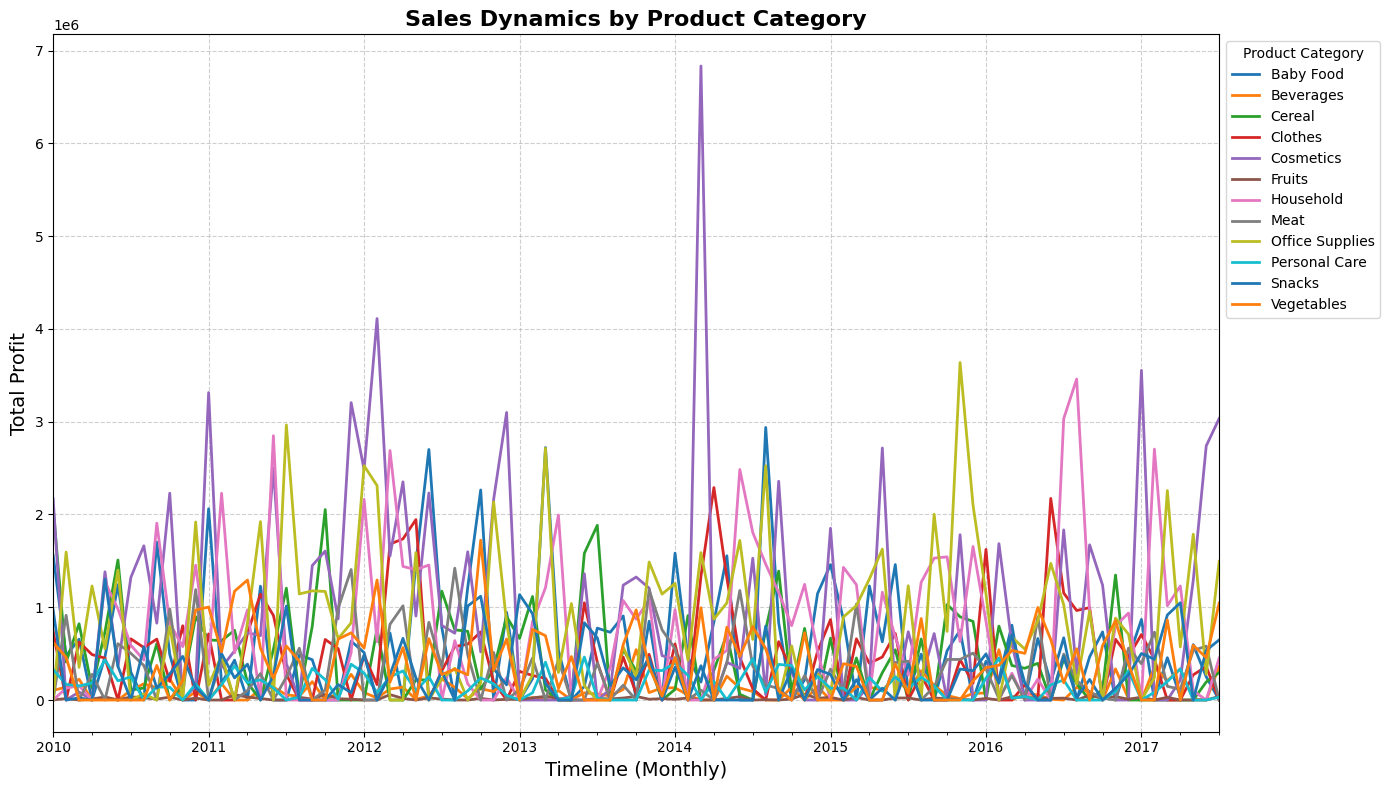

----------------------------------------
FINDINGS: The data shows complex fluctuations across categories. 
A detailed strategic review for each individual category is recommended to identify specific growth drivers.
----------------------------------------
GENERATING VISUALIZATION: SALES DYNAMICS BY REGION


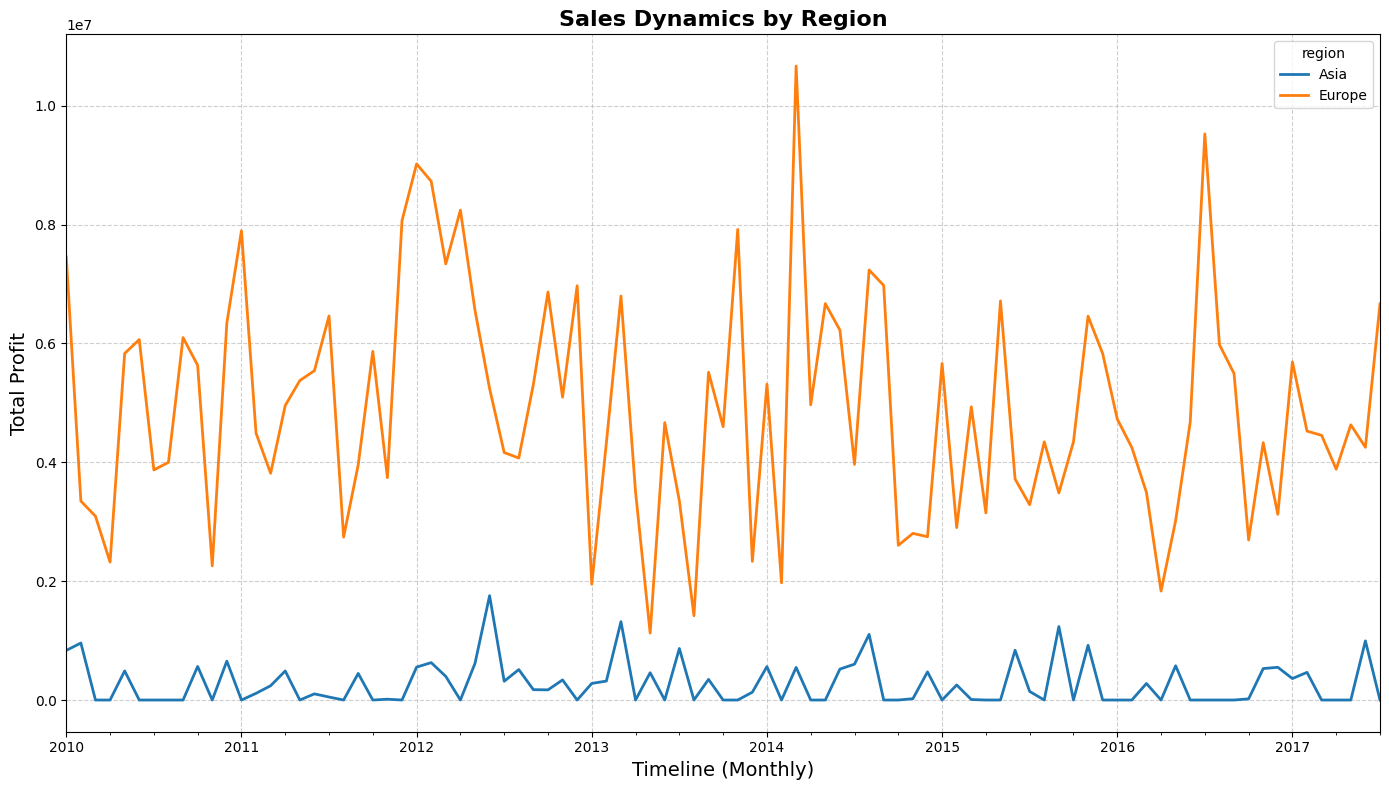

----------------------------------------
FINDINGS: We observe high volatility across regions. Profit levels exhibit significant peaks 
and occasional drops near zero, suggesting strong seasonality or period-specific market events.
----------------------------------------
GENERATING VISUALIZATION: SALES DYNAMICS BY COUNTRY (TOP 5)


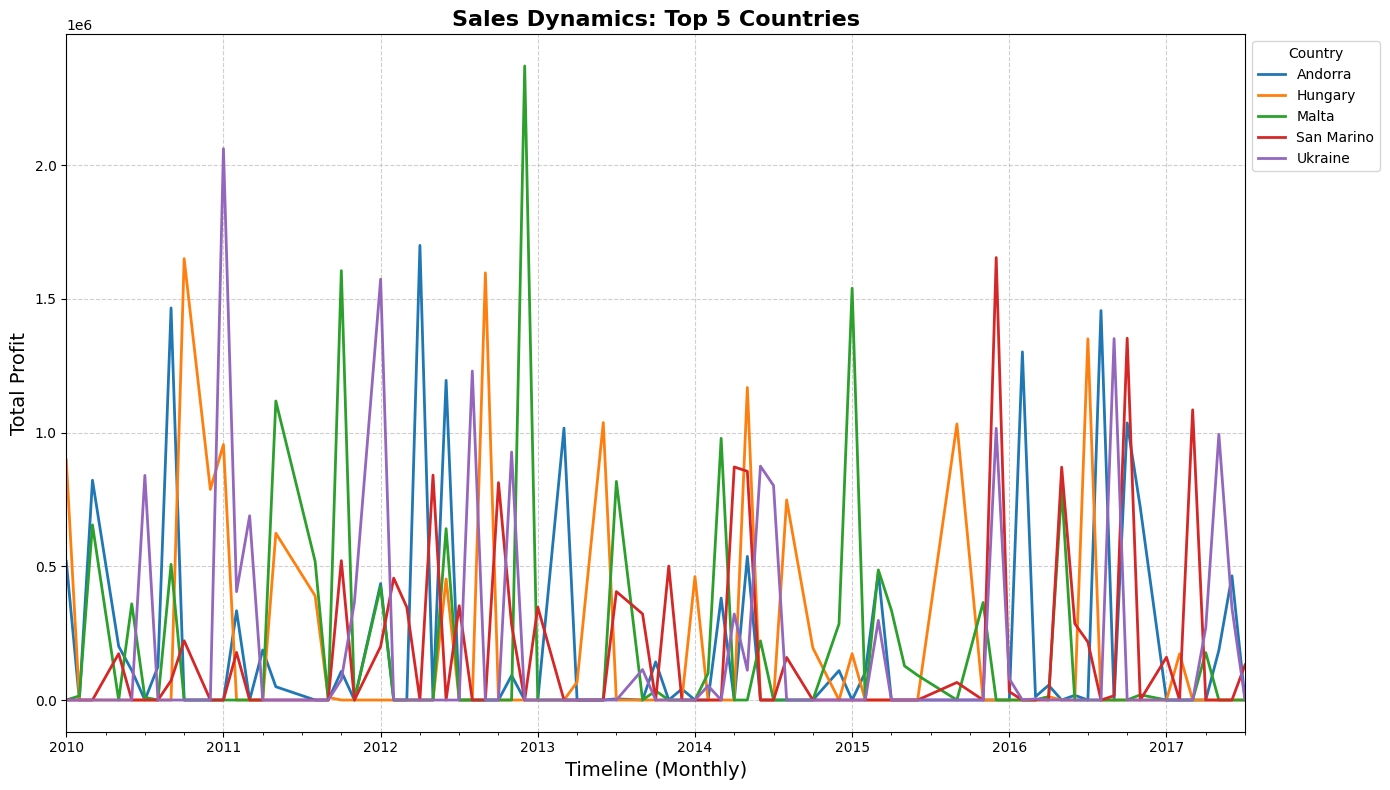

----------------------------------------
FINDINGS: Similar to the regional analysis, individual countries show high volatility. 
In-depth analysis of specific country-level factors would be required for precise forecasting.
----------------------------------------
TASK 3.6: WEEKLY SALES VOLUME ANALYSIS



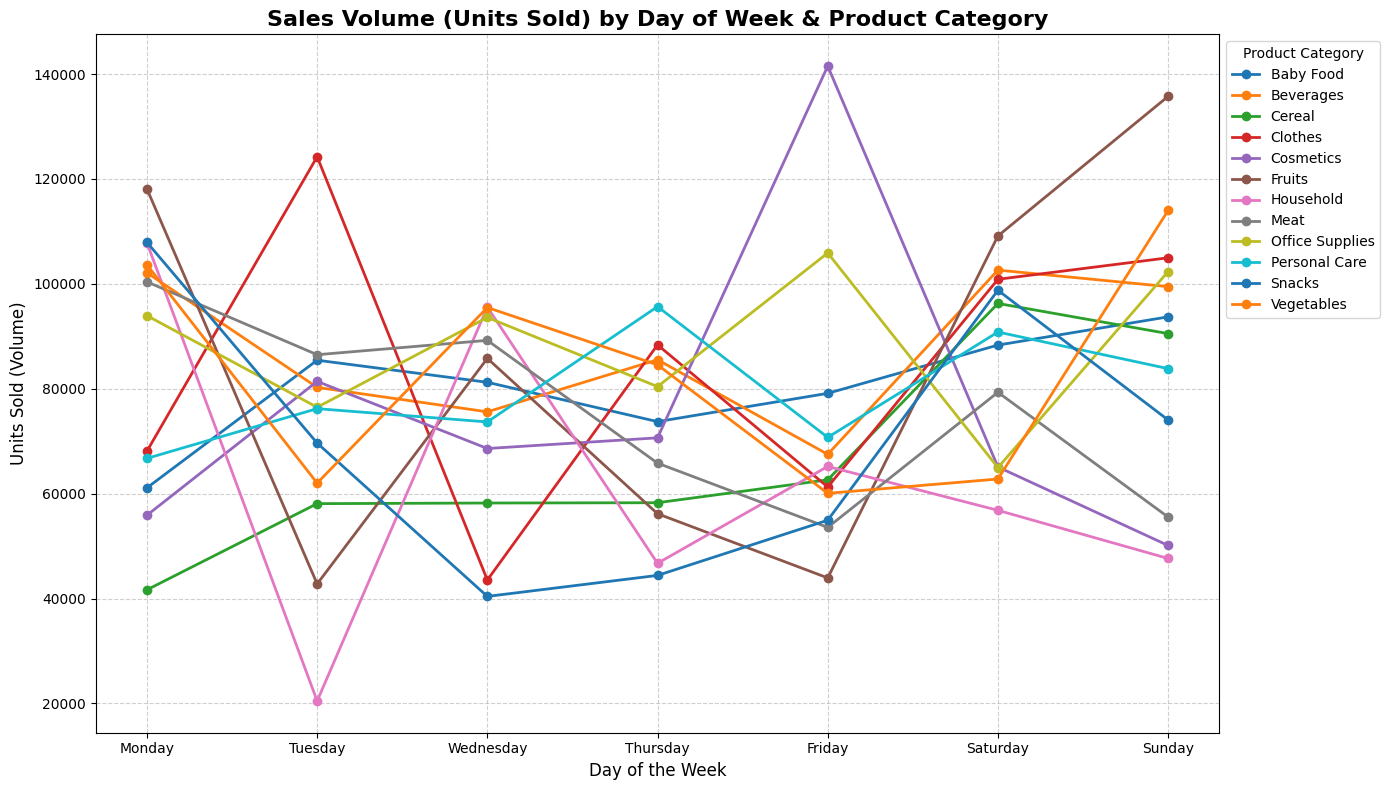

----------------------------------------
FINDINGS: Specific product categories exhibit strong weekly patterns. 
Significant fluctuations in sales volume are observed on particular days, 
which can be used to optimize promotional timing and supply chain readiness.
----------------------------------------


In [3]:
import pandas as pd
import zipfile
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')



file_path = "/content/drive/My Drive/dataset (1).zip"


with zipfile.ZipFile(file_path, 'r') as z:
    with z.open('13. Final project/countries.csv') as f:
        df_countries = pd.read_csv(io.BytesIO(f.read()))

    with z.open('13. Final project/products.csv') as f:
        df_products = pd.read_csv(io.BytesIO(f.read()))

    with z.open('13. Final project/events.csv') as f:
        df_events = pd.read_csv(io.BytesIO(f.read()))


print("TASK 1: DATA EXPLORATION\n")

# --- COUNTRIES TABLE ---
print("COUNTRIES TABLE OVERVIEW\n")
print(df_countries.head())
print("-" * 40)
df_countries.info()
print("-" * 40)
print("Column Descriptions:\n")
print("name - country name")
print("alpha-2 - two-letter country code")
print("alpha-3 - three-letter country code")
print("region - continental region")
print("sub-region - sub-region")
print("-" * 40)

# --- PRODUCTS TABLE ---
print("PRODUCTS TABLE OVERVIEW\n")
print(df_products.head())
print("-" * 40)
df_products.info()
print("-" * 40)
print("Column Descriptions:\n")
print("id - product identifier")
print("item_type - product category")
print("-" * 40)

# --- EVENTS TABLE ---
print("EVENTS TABLE OVERVIEW\n")
print(df_events.head())
df_events.info()
print("-" * 40)
print("Column Descriptions:\n")
print("Order ID - unique order number")
print("Order date - date of order placement")
print("Ship date - date of shipment")
print("Order priority - importance level of the order")
print("Country code - country identifier")
print("Product ID - product identifier")
print("Sales channel - distribution channel")
print("Units sold - quantity of items sold")
print("Unit price - price per unit")
print("Unit cost - cost per unit")
print("-" * 40)

# --- DATAFRAME SHAPES ---
print(f"Events table shape: {df_events.shape}")
print("-" * 40)
print(f"Countries table shape: {df_countries.shape}")
print("-" * 40)
print(f"Products table shape: {df_products.shape}")
print("-" * 40)
print("TASK 1.1: DATA RELATIONSHIPS\n")
print("Key fields for table joins:\n")
print("- 'alpha-3' (countries) connects to 'Country code' (events)")
print("- 'Product ID' (events) connects to 'id' (products)")
print("-" * 40)

print("TASK 2: MISSING VALUES ANALYSIS\n")

# --- COUNTRIES TABLE MISSING VALUES ---
print("Missing values in Countries table:")
print(df_countries.isna().sum())
print("\nPercentage of missing values:")
print((df_countries.isna().sum() / df_countries.shape[0] * 100).round(3), "%")
print("-" * 40)

# --- PRODUCTS TABLE MISSING VALUES ---
print("Missing values in Products table:")
print(df_products.isna().sum())
print("\nPercentage of missing values:")
print((df_products.isna().sum() / df_products.shape[0] * 100).round(3), "%")
print("-" * 40)

# --- EVENTS TABLE MISSING VALUES ---
print("Missing values in Events table:")
print(df_events.isna().sum())
print("\nPercentage of missing values:")
print((df_events.isna().sum() / df_events.shape[0] * 100).round(3), "%")
print("-" * 40)

print("FINDINGS & CONCLUSIONS:\n")
print("No critical values are missing across the primary keys. We observe marginal gaps")
print("in categories such as 'region' and 'sub-region', and a slightly higher number")
print("of missing values in country name abbreviations (alpha-2/alpha-3).")
print("-" * 40)
print("TASK 2.1: HANDLING MISSING VALUES\n")

# Filling missing values with a placeholder
df_countries.fillna("Unknown", inplace=True)
df_events.fillna("Unknown", inplace=True)
df_products.fillna("Unknown", inplace=True)

print("Status: Missing values replaced with 'Unknown'.")
print("Reasoning: No critical data points were missing. Replacing with a placeholder")
print("preserves the integrity of the dataset without losing entire rows.")
print("-" * 40)

print("TASK 2.2: DATA TYPE CONVERSION\n")

# Converting columns to appropriate data types
df_countries = df_countries.astype(str)
df_products["item_type"] = df_products["item_type"].astype(str)

# Ensuring date columns are in datetime format for time-series analysis
df_events["Order Date"] = pd.to_datetime(df_events["Order Date"])
df_events["Ship Date"] = pd.to_datetime(df_events["Ship Date"])

# Categorical and ID columns to string
df_events['Order Priority'] = df_events['Order Priority'].astype(str)
df_events['Country Code'] = df_events['Country Code'].astype(str)
df_events["Sales Channel"] = df_events["Sales Channel"].astype(str)

print("Status: Column data types have been successfully converted.")
print("-" * 40)
print("TASK 2.3: DUPLICATE ANALYSIS\n")

# Checking for duplicate rows across all tables
print("Total duplicates in Countries table:")
print(df_countries.duplicated().sum())
print("-" * 40)

print("Total duplicates in Products table:")
print(df_products.duplicated().sum())
print("-" * 40)

print("Total duplicates in Events table:")
print(df_events.duplicated().sum())
print("-" * 40)

print("FINDINGS:")
print("No duplicate records were found in any of the datasets.")
print("-" * 40)

print("TASK 2.4: ANOMALY DETECTION (DESCRIPTIVE STATISTICS)\n")

# Reviewing statistical summaries to identify potential outliers or data entry errors
print(df_countries.describe())
print(df_events.describe())
print(df_products.describe())

print("\nFINDINGS: Statistical analysis shows no significant anomalies or outliers.")
print("-" * 40)

print("TASK 3: DATA MERGING & FINAL CLEANING\n")

# Merging tables: First joining events with countries, then joining the result with products
df_events_countries = pd.merge(df_events, df_countries, left_on="Country Code", right_on="alpha-3", how="left")
df_final = pd.merge(df_events_countries, df_products, left_on="Product ID", right_on="id", how="left")

print("Status: Tables successfully merged into df_final.")

# List of columns that are no longer needed after the join (redundant IDs and codes)
columns_to_remove = ["alpha-3", "alpha-2", "Product ID"]
df_final.drop(columns_to_remove, axis=1, inplace=True)

print(f"Status: Redundant columns {columns_to_remove} have been successfully removed.")
print("-" * 40)
print("TASK 3.1: KEY PERFORMANCE INDICATORS (KPIs)\n")

# 1. Total Number of Orders
total_orders = df_final.shape[0]
print(f"Total number of orders: {total_orders}")
print("-" * 40)

# 2. Data Preparation for Financial Calculations
# Converting financial columns to numeric, handling potential errors
numeric_cols = ["Unit Price", "Unit Cost", "Units Sold"]
for col in numeric_cols:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

# 3. Profit and Revenue Calculations
# Calculating profit per unit, total profit per order, and total revenue
df_final["Profit per unit"] = df_final["Unit Price"] - df_final["Unit Cost"]
df_final["Total Profit"] = df_final["Profit per unit"] * df_final["Units Sold"]
df_final["Total Revenue"] = df_final["Units Sold"] * df_final["Unit Price"]

# 4. Total Financial Results
total_profit = df_final["Total Profit"].sum()
print(f"Total Profit: {total_profit:,.2f}") # Added formatting for better readability
print("-" * 40)

# 5. Market Reach
unique_countries = df_final["name"].nunique()
print(f"Total unique countries served: {unique_countries}")
print("-" * 40)
print("TASK 3.2: MULTIDIMENSIONAL SALES ANALYSIS\n")

# Calculating Total Cost for detailed margin analysis
df_final['Total Cost'] = df_final['Units Sold'] * df_final['Unit Cost']

# --- 1. Regional Performance Analysis ---
regional_analysis = df_final.groupby('region').agg(
    Total_Revenue=('Total Revenue', 'sum'),
    Total_Cost=('Total Cost', 'sum'),
    Total_Profit=('Total Profit', 'sum'),
    Units_Sold=('Units Sold', 'sum')
).sort_values(by='Total_Profit', ascending=False)

print("\nSales Analysis by Region:")
print(regional_analysis.round(2))
print("-" * 40)

# --- 2. Country Performance Analysis (Top 10) ---
country_analysis = df_final.groupby('name').agg(
    Total_Profit=('Total Profit', 'sum'),
    Units_Sold=('Units Sold', 'sum')
).sort_values(by='Total_Profit', ascending=False).head(10)

print("\nSales Analysis (Top 10 Countries):")
print(country_analysis.round(2))
print("-" * 40)

# --- 3. Product Category Performance ---
product_analysis = df_final.groupby('item_type').agg(
    Total_Revenue=('Total Revenue', 'sum'),
    Total_Profit=('Total Profit', 'sum'),
    Units_Sold=('Units Sold', 'sum')
).sort_values(by='Total_Profit', ascending=False)

print("\nSales Analysis by Product Category:")
print(product_analysis.round(2))
print("-" * 40)

# --- 4. Sales Channel Performance ---
df_final["Sales Channel"] = df_final["Sales Channel"].str.lower()
channel_analysis = df_final.groupby('Sales Channel').agg(
    Total_Profit=('Total Profit', 'sum'),
    Units_Sold=('Units Sold', 'sum')
).sort_values(by='Total_Profit', ascending=False)

print("\nSales Analysis by Distribution Channel:")
print(channel_analysis.round(2))
print("-" * 40)

# --- VISUALIZATION: TOTAL PROFIT BY REGION ---
print("GENERATING VISUALIZATION: TOTAL PROFIT BY REGION")
data_to_plot1 = regional_analysis['Total_Profit'].reset_index()

plt.figure(figsize=(10, 6)) # Added figure size for better clarity
bars1 = plt.bar(data_to_plot1['region'], data_to_plot1['Total_Profit'] / 1000000,
                color=['skyblue', 'salmon', 'lightgreen', 'gold'])

plt.title('Total Profit by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit (in Millions)', fontsize=12)
plt.xticks(rotation=45) # Rotated labels for better readability if needed
plt.tight_layout()
plt.show()
print("-" * 40)
# --- Regional Findings ---
print("FINDINGS: As shown, sales are heavily concentrated in Europe. Asia accounts for only a small fraction of the total volume.")
print("-" * 40)

# --- VISUALIZATION: TOP 10 COUNTRIES ---
print("GENERATING VISUALIZATION: SALES ANALYSIS BY COUNTRY")
data_to_plot2 = country_analysis['Total_Profit'].reset_index()

plt.figure(figsize=(12, 6))
bars2 = plt.bar(data_to_plot2['name'], data_to_plot2['Total_Profit'] / 1000000, color='teal')

plt.title('Total Profit (Top 10 Countries)', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Profit (in Millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: Interestingly, the top 10 countries show very similar total profit levels. ")
print("This uniformity is noteworthy given the significant economic and geographical differences between these nations.")
print("-" * 40)

# --- VISUALIZATION: PRODUCT CATEGORIES ---
print("GENERATING VISUALIZATION: SALES ANALYSIS BY PRODUCT CATEGORY")
data_to_plot3 = product_analysis['Total_Profit'].reset_index()

plt.figure(figsize=(12, 6))
bars3 = plt.bar(data_to_plot3["item_type"], data_to_plot3["Total_Profit"] / 1000000, color='royalblue')

plt.title('Total Profit by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel("Total Profit (in Millions)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: Most categories show distinct sales performance; however, ")
print("no single category significantly outperforms the rest of the portfolio.")
print("-" * 40)
# --- VISUALIZATION: SALES CHANNEL PERFORMANCE ---
print("GENERATING VISUALIZATION: TOTAL PROFIT BY SALES CHANNEL")
data_to_plot4 = channel_analysis['Total_Profit'].reset_index()

plt.figure(figsize=(10, 6))
bars4 = plt.bar(data_to_plot4['Sales Channel'], data_to_plot4['Total_Profit'] / 1000000, color="purple")

plt.title('Total Profit by Sales Channel', fontsize=16, fontweight='bold')
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Total Profit (in Millions)', fontsize=12)
plt.xticks(rotation=0, size=12) # Reduced rotation as there are only 2 categories
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: Sales performance is remarkably balanced between Online and Offline channels,")
print("with a marginal lead for the Offline segment.")
print("-" * 40)

print("TASK 3.3: LOGISTICS PERFORMANCE (SHIPPING TIME ANALYSIS)\n")

# Calculating the duration between order placement and shipment
df_final['Ship Duration'] = df_final['Ship Date'] - df_final['Order Date']
df_final['Ship Days'] = df_final['Ship Duration'].dt.days

# Aggregating average shipping time by product category
shipping_analysis = df_final.groupby('item_type')['Ship Days'].mean().sort_values(ascending=False)
data_to_plot5 = shipping_analysis.reset_index()

print("GENERATING VISUALIZATION: AVERAGE SHIPPING DURATION BY CATEGORY")
plt.figure(figsize=(12, 6))
bars = plt.bar(data_to_plot5['item_type'], data_to_plot5['Ship Days'], color="orange")

plt.title('Average Shipping Duration by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel("Average Shipping Time (Days)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: The average shipping duration is consistent across all product categories,")
print("indicating a standardized logistics process with minimal variance between different goods.")
print("-" * 40)
# --- VISUALIZATION: SHIPPING TIME BY COUNTRY ---
print("GENERATING VISUALIZATION: AVERAGE SHIPPING DURATION BY COUNTRY (TOP 10)")
shipping_by_country = df_final.groupby('name')['Ship Days'].mean().sort_values(ascending=False)
data_to_plot6 = shipping_by_country.head(10).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(data_to_plot6['name'], data_to_plot6['Ship Days'], color="brown")

plt.title('Average Shipping Duration by Country (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel("Average Shipping Time (Days)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: Shipping times are remarkably consistent across countries. ")
print("Only Hungary shows a slight deviation with a marginally longer average duration.")
print("-" * 40)

# --- VISUALIZATION: SHIPPING TIME BY REGION ---
print("GENERATING VISUALIZATION: AVERAGE SHIPPING DURATION BY REGION")
shipping_by_region = df_final.groupby('region')['Ship Days'].mean().sort_values(ascending=False)
data_to_plot7 = shipping_by_region.reset_index()

plt.figure(figsize=(10, 6))
plt.bar(data_to_plot7['region'], data_to_plot7['Ship Days'], color="lightgreen")

plt.title('Average Shipping Duration by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel("Average Shipping Time (Days)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: Asia exhibits a slightly longer average shipping duration compared to Europe, ")
print("though the variance remains minimal.")
print("-" * 40)

print("TASK 3.4: CORRELATION ANALYSIS (PROFIT VS. SHIPPING TIME)\n")

# Investigating if delivery speed impacts profitability
plt.figure(figsize=(10, 6))
plt.scatter(df_final['Ship Days'], df_final['Total Profit'], alpha=0.3, s=15, color='steelblue')

plt.title("Correlation: Total Profit vs. Shipping Duration", fontsize=16, fontweight='bold')
plt.xlabel("Shipping Days", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: There is virtually no correlation between total profit and shipping duration. ")
print("Profitability appears to be independent of the time taken to fulfill an order.")
print("-" * 40)
print("TASK 3.5: SALES DYNAMICS & TREND ANALYSIS\n")

# Preparing data for time-series analysis by creating a monthly period column
df_final['Order Month'] = df_final['Order Date'].dt.to_period('M')

# --- 1. Sales Dynamics by Product Category ---
print("GENERATING VISUALIZATION: SALES DYNAMICS BY PRODUCT CATEGORY")
product_dynamics = df_final.groupby(['Order Month', 'item_type'])["Total Profit"].sum().unstack().fillna(0)

plt.figure(figsize=(14, 8))
product_dynamics.plot(kind='line', ax=plt.gca(), linewidth=2)

plt.title('Sales Dynamics by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Timeline (Monthly)', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Product Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: The data shows complex fluctuations across categories. ")
print("A detailed strategic review for each individual category is recommended to identify specific growth drivers.")
print("-" * 40)

# --- 2. Sales Dynamics by Region ---
print("GENERATING VISUALIZATION: SALES DYNAMICS BY REGION")
regional_dynamics = df_final.groupby(['Order Month', 'region'])["Total Profit"].sum().unstack().fillna(0)

plt.figure(figsize=(14, 8))
regional_dynamics.plot(kind='line', ax=plt.gca(), linewidth=2)

plt.title("Sales Dynamics by Region", fontsize=16, fontweight='bold')
plt.xlabel('Timeline (Monthly)', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: We observe high volatility across regions. Profit levels exhibit significant peaks ")
print("and occasional drops near zero, suggesting strong seasonality or period-specific market events.")
print("-" * 40)

# --- 3. Sales Dynamics by Country (Top 5) ---
print("GENERATING VISUALIZATION: SALES DYNAMICS BY COUNTRY (TOP 5)")
top_5_countries = df_final.groupby('name')["Total Profit"].sum().nlargest(5).index.tolist()
df_top_countries = df_final[df_final['name'].isin(top_5_countries)]

country_dynamics = df_top_countries.groupby(['Order Month', 'name'])["Total Profit"].sum().unstack().fillna(0)

plt.figure(figsize=(14, 8))
country_dynamics.plot(kind='line', ax=plt.gca(), linewidth=2)

plt.title("Sales Dynamics: Top 5 Countries", fontsize=16, fontweight='bold')
plt.xlabel('Timeline (Monthly)', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: Similar to the regional analysis, individual countries show high volatility. ")
print("In-depth analysis of specific country-level factors would be required for precise forecasting.")
print("-" * 40)
print("TASK 3.6: WEEKLY SALES VOLUME ANALYSIS\n")

# Extracting day names and numerical day of the week (0=Monday, 6=Sunday)
df_final['Day of Week'] = df_final['Order Date'].dt.day_name()
df_final['Day of Week Num'] = df_final['Order Date'].dt.dayofweek

# Aggregating sales volume (Units Sold) by day and category
weekly_category_analysis = df_final.groupby(['Day of Week Num', 'item_type'])['Units Sold'].sum().unstack().fillna(0)

# Mapping numerical days to English names for professional reporting
day_mapping = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
weekly_category_analysis.index = weekly_category_analysis.index.map(day_mapping)

# Visualizing sales volume trends throughout the week
plt.figure(figsize=(14, 8))
weekly_category_analysis.plot(kind='line', ax=plt.gca(), marker='o', linewidth=2)

plt.title('Sales Volume (Units Sold) by Day of Week & Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Units Sold (Volume)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Product Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

print("-" * 40)
print("FINDINGS: Specific product categories exhibit strong weekly patterns. ")
print("Significant fluctuations in sales volume are observed on particular days, ")
print("which can be used to optimize promotional timing and supply chain readiness.")
print("-" * 40)


In [ ]:
!pip install numpy